In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from dateutil.parser import parse


In [17]:
# Load the CSV file
file_path = 'C:/Users/zack/Downloads/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(file_path)

In [18]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,6/12/2019 10:10,6/12/2019 10:55,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,37:14.0,56:53.0,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,13:00.0,22:45.0,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2/21/2022 17:43,2/21/2022 19:43,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,12/4/2020 1:46,12/4/2020 4:13,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
5,A-1101469,Source2,2,3/29/2021 7:03,3/29/2021 8:51,42.532082,-70.944267,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7222249,Source1,2,1/14/2020 16:49,1/14/2020 20:49,42.421280,-123.119450,42.421280,-123.119450,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-6198239,Source1,2,48:00.0,09:09.0,30.191010,-85.682508,30.190329,-85.682530,0.047,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-4222549,Source1,2,10/12/2022 13:59,10/12/2022 15:33,32.868947,-96.804018,32.869500,-96.804014,0.038,...,False,True,False,False,False,False,Day,Day,Day,Day
9,A-5924038,Source1,2,10/21/2021 7:39,10/21/2021 9:24,39.717218,-86.124691,39.733478,-86.137021,1.301,...,False,False,False,False,False,False,Night,Day,Day,Day


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [20]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


As we can see above, the majority of the data is likely to be valid, but there do seem to be some extremem outliers which need to be cleaned up which we will do in the next few steps.

<Axes: >

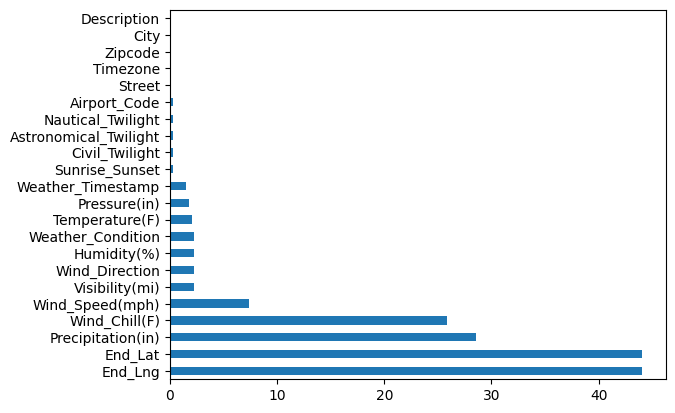

In [21]:
# Percent of missing values per column
percent_missing = df.isnull().sum().sort_values(ascending = False) * 100 / len(df)
percent_missing[percent_missing!= 0].plot(kind = 'barh')

As we can see above there is a lot of missing data in the file, especially for the latitude and longitude variables which we will clean.

In [23]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

In [24]:
print("Missing values:\n", missing_values)
print("\nNumber of duplicates:", duplicates)

Missing values:
 ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                   

In [49]:
# Accidents by Weather Conditions

weather_conditions = df['Weather_Condition'].unique()
weather_conditions_accidents = df['Weather_Condition'].value_counts().reset_index(name='Count')
weather_conditions_accidents.head(10)

,Weather_Condition,Count
0,Fair,166053
1,Mostly Cloudy,65398
2,Cloudy,53107
3,Clear,52379
4,Partly Cloudy,45125
5,Overcast,24901
6,Light Rain,22718
7,Scattered Clouds,13030
8,Light Snow,8233
9,Fog,6445


<Axes: xlabel='Count', ylabel='Weather_Condition'>

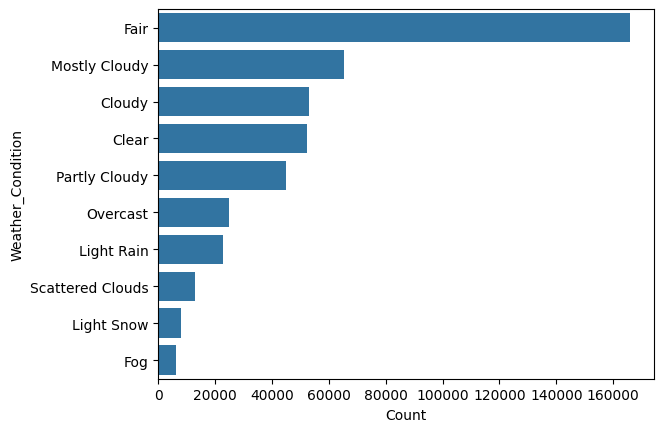

In [50]:
# visualizing accidents by weather conditions
sns.barplot(weather_conditions_accidents.head(10), x='Count', y='Weather_Condition')

In [33]:
#Finiding Resolution time as per start time and end time

df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)

In [51]:
# Resolution time as per severity of accident (in hours)
resolution_time_severity = df.groupby('Severity').agg(
    mean_resolution_time=('Resolution_Time', 'mean'),
    accident_count=('Resolution_Time', 'count')
)
resolution_time_severity

,mean_resolution_time,accident_count
Severity,,
1,0.766171,4274
2,7.331657,358057
3,1.284333,84518
4,26.480574,12048


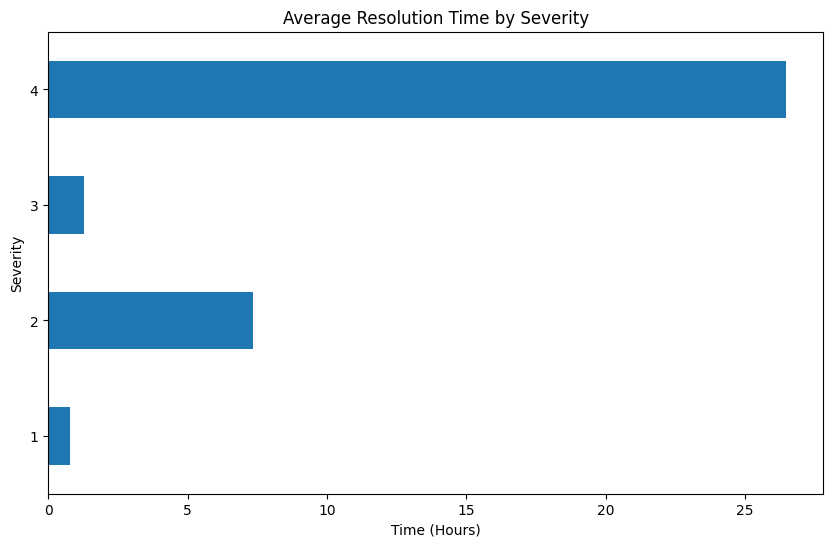

In [52]:
# Visualize - Average Resolution Time

resolution_time_severity['mean_resolution_time'].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Time (Hours)')
plt.ylabel('Severity')
plt.title('Average Resolution Time by Severity')
plt.show()

Now that our preliminary EDA before data cleaning is complete. We can now go on to clean up the data.

In [16]:
# Load the CSV file
file_path = 'C:/Users/zack/Downloads/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(file_path)

# Convert Start_Time to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT values in Start_Time
df = df.dropna(subset=['Start_Time'])

# Drop columns with a high percentage of missing values (e.g., > 50%)
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

# Fill missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Check for duplicates and remove them
df = df.drop_duplicates()

# Handle outliers (capping the 'Distance(mi)' at the 99th percentile)
distance_cap = df['Distance(mi)'].quantile(0.99)
df['Distance(mi)'] = df['Distance(mi)'].clip(upper=distance_cap)

# Verify the cleaning process
print("Data cleaning completed.")
print("Missing values after cleaning:")
print(df.isnull().sum())

Data cleaning completed.
Missing values after cleaning:
ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0

Hourly distribution of accidents:
Hour
0      7374
1      6265
2      6151
3      5425
4     10380
5     14754
6     26094
7     37988
8     37626
9     23523
10    22523
11    22765
12    22965
13    25400
14    28959
15    34126
16    37424
17    37099
18    27929
19    19115
20    14529
21    12421
22    10998
23     8167
Name: count, dtype: int64

Day of the week distribution of accidents:
DayOfWeek
0    78456
1    83090
2    84948
3    85216
4    88766
5    43384
6    36140
Name: count, dtype: int64


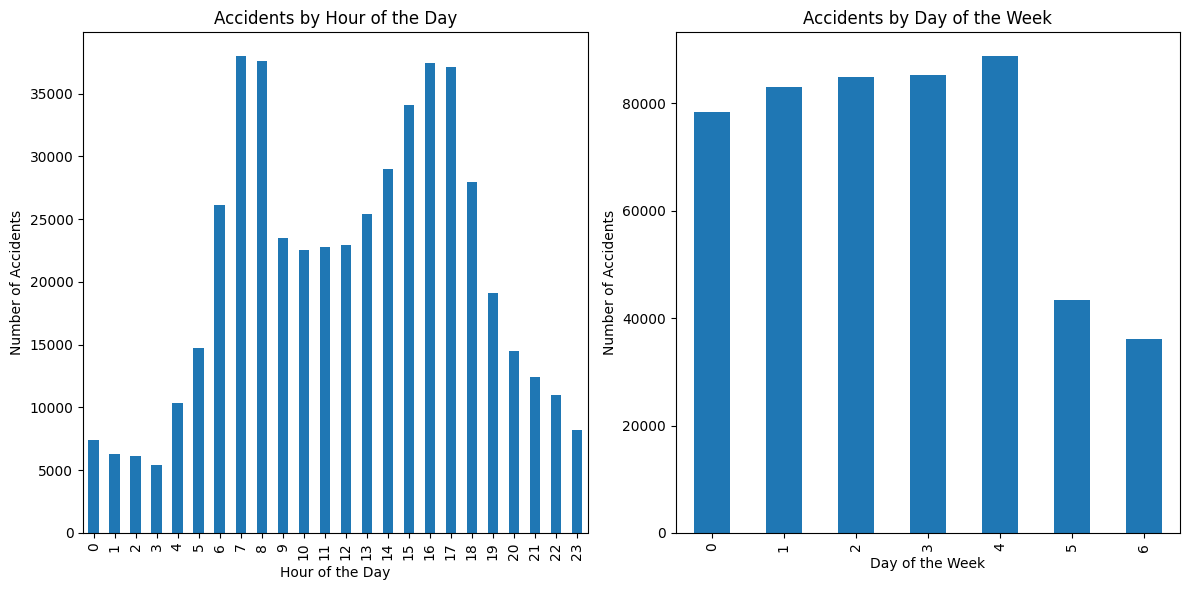

In [7]:
# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Analyze the distribution of accidents by hour of the day
hourly_distribution = df['Hour'].value_counts().sort_index()
print("Hourly distribution of accidents:")
print(hourly_distribution)

# Analyze the distribution of accidents by day of the week
dayofweek_distribution = df['DayOfWeek'].value_counts().sort_index()
print("\nDay of the week distribution of accidents:")
print(dayofweek_distribution)

# Plotting the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hourly_distribution.plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

plt.subplot(1, 2, 2)
dayofweek_distribution.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

In the above graph Day 0 is Monday and Day 6 is Sunday

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
# Create target variable: accidents occur (1) or not (0)
df['Accident_Occurred'] = 1

# Select features and target
X = df[['Hour', 'DayOfWeek']]
y = df['Accident_Occurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

We are getting this error because there are no samples where the target variable is 0 aka no accident has occured since this entire dataset only contains accidents.
Therefore in order to test our model we have to create a synthetic dataset with randomly selected times and days where no accidents occured 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from dateutil.parser import parse

In [15]:
# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Create a synthetic non-accident dataset
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=5000),
    'DayOfWeek': np.random.randint(0, 7, size=5000),
    'Accident_Occurred': 0
})


Hourly distribution of accidents:
Hour
0      7374
1      6265
2      6151
3      5425
4     10380
5     14754
6     26094
7     37988
8     37626
9     23523
10    22523
11    22765
12    22965
13    25400
14    28959
15    34126
16    37424
17    37099
18    27929
19    19115
20    14529
21    12421
22    10998
23     8167
Name: count, dtype: int64

Day of the week distribution of accidents:
DayOfWeek
0    78456
1    83090
2    84948
3    85216
4    88766
5    43384
6    36140
Name: count, dtype: int64


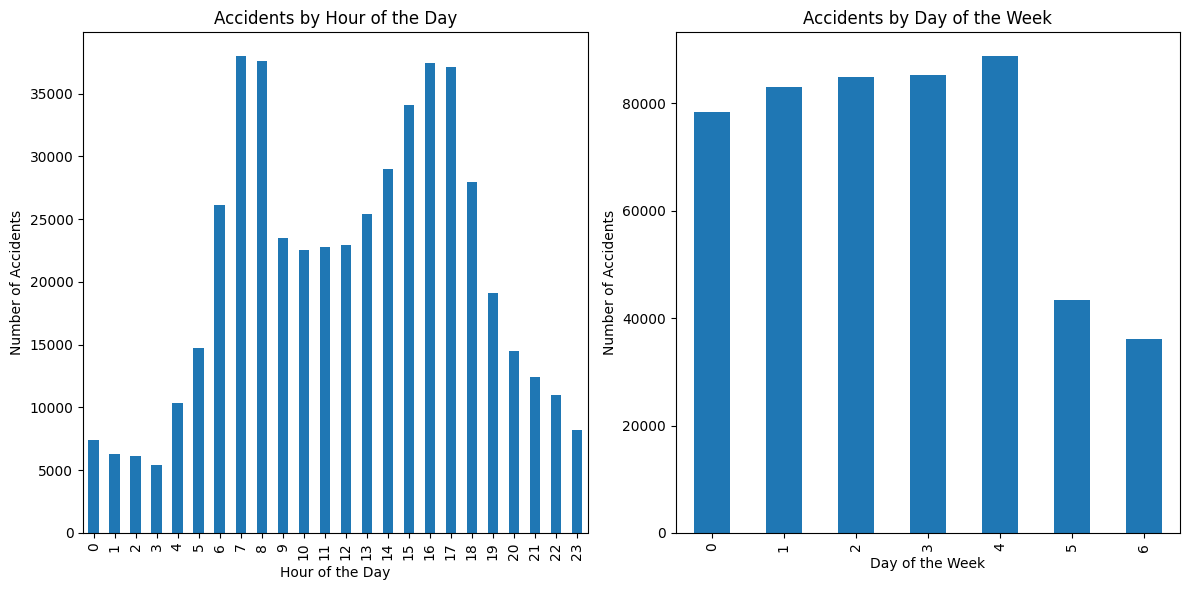

In [16]:
# Combine the accident and non-accident datasets
combined_df = pd.concat([df[['Hour', 'DayOfWeek', 'Accident_Occurred']], non_accidents])

# Analyze the distribution of accidents by hour of the day
hourly_distribution = combined_df[combined_df['Accident_Occurred'] == 1]['Hour'].value_counts().sort_index()
print("Hourly distribution of accidents:")
print(hourly_distribution)

# Analyze the distribution of accidents by day of the week
dayofweek_distribution = combined_df[combined_df['Accident_Occurred'] == 1]['DayOfWeek'].value_counts().sort_index()
print("\nDay of the week distribution of accidents:")
print(dayofweek_distribution)

# Plotting the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hourly_distribution.plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

plt.subplot(1, 2, 2)
dayofweek_distribution.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()


Below we load in the cleaned dataset created using synthetic data to balance the dataset and provide our 0 (no accidents) response.
Here we create our Logistic Regression Model

Hourly distribution of accidents:
Hour
0      7374
1      6265
2      6151
3      5425
4     10380
5     14754
6     26094
7     37988
8     37626
9     23523
10    22523
11    22765
12    22965
13    25400
14    28959
15    34126
16    37424
17    37099
18    27929
19    19115
20    14529
21    12421
22    10998
23     8167
Name: count, dtype: int64

Day of the week distribution of accidents:
DayOfWeek
0    78456
1    83090
2    84948
3    85216
4    88766
5    43384
6    36140
Name: count, dtype: int64


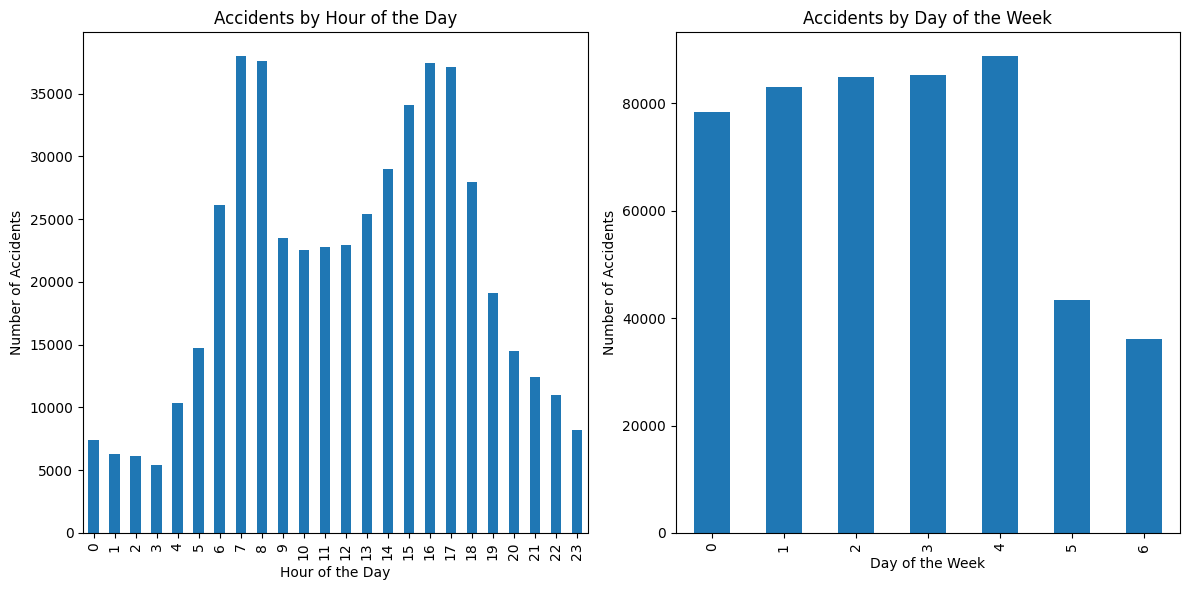

Accuracy: 0.550085
Confusion Matrix:
[[54327 45686]
 [44297 55690]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55    100013
           1       0.55      0.56      0.55     99987

    accuracy                           0.55    200000
   macro avg       0.55      0.55      0.55    200000
weighted avg       0.55      0.55      0.55    200000



In [24]:
#The cleaned dataset df is loaded in to create the logistic regression model

# Convert Start_Time to datetime format
df['Start_Time'] = df['Start_Time'].apply(lambda x: x if isinstance(x, pd.Timestamp) else parse(x))

# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Create more synthetic non-accident data
non_accidents_count = len(df)
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=non_accidents_count),
    'DayOfWeek': np.random.randint(0, 7, size=non_accidents_count),
    'Accident_Occurred': 0
})

# Combine the accident and non-accident datasets
combined_df = pd.concat([df[['Hour', 'DayOfWeek', 'Accident_Occurred']], non_accidents])

# Resample to balance the dataset
min_count = min(combined_df['Accident_Occurred'].value_counts())
balanced_df = pd.concat([
    combined_df[combined_df['Accident_Occurred'] == 1].sample(min_count, random_state=42),
    combined_df[combined_df['Accident_Occurred'] == 0].sample(min_count, random_state=42)
])

# Analyze the distribution of accidents by hour of the day
hourly_distribution = balanced_df[balanced_df['Accident_Occurred'] == 1]['Hour'].value_counts().sort_index()
print("Hourly distribution of accidents:")
print(hourly_distribution)

# Analyze the distribution of accidents by day of the week
dayofweek_distribution = balanced_df[balanced_df['Accident_Occurred'] == 1]['DayOfWeek'].value_counts().sort_index()
print("\nDay of the week distribution of accidents:")
print(dayofweek_distribution)

# Plotting the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hourly_distribution.plot(kind='bar')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

plt.subplot(1, 2, 2)
dayofweek_distribution.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

# Select features and target
X = balanced_df[['Hour', 'DayOfWeek']]
y = balanced_df['Accident_Occurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: The logistic regression model correctly predicts 55% of the cases.
Confusion Matrix: The model has the following predictions:
True Negatives (TN): 54327
False Positives (FP): 45686
False Negatives (FN): 44297
True Positives (TP): 55690
Classification Report:
Class 0 (Non-Accidents): Precision and recall are around 55%.
Class 1 (Accidents): Precision and recall are also around 55%.

Now we do this again but for the Random Forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
df = pd.read_csv(file_path)

# Convert Start_Time to datetime format
df['Start_Time'] = df['Start_Time'].apply(lambda x: x if isinstance(x, pd.Timestamp) else parse(x))

# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Select additional features
features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition']
df = df[features + ['Accident_Occurred']]

# Handle missing values by filling with median for numerical and mode for categorical
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Condition'])

# Create more synthetic non-accident data
non_accidents_count = len(df)
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=non_accidents_count),
    'DayOfWeek': np.random.randint(0, 7, size=non_accidents_count),
    'Temperature(F)': np.random.normal(df['Temperature(F)'].mean(), df['Temperature(F)'].std(), non_accidents_count),
    'Visibility(mi)': np.random.normal(df['Visibility(mi)'].mean(), df['Visibility(mi)'].std(), non_accidents_count),
    'Accident_Occurred': 0
})

# For simplicity, assume 'Clear' weather condition for synthetic non-accidents
for col in df.columns:
    if 'Weather_Condition_' in col:
        non_accidents[col] = 0
non_accidents['Weather_Condition_Clear'] = 1

# Combine the accident and non-accident datasets
combined_df = pd.concat([df, non_accidents])

# Resample to balance the dataset
min_count = min(combined_df['Accident_Occurred'].value_counts())
balanced_df = pd.concat([
    combined_df[combined_df['Accident_Occurred'] == 1].sample(min_count, random_state=42),
    combined_df[combined_df['Accident_Occurred'] == 0].sample(min_count, random_state=42)
])

# Select features and target
#Note that here for x we are dropping the accidents occured column to prevent data leakage
X = balanced_df.drop(columns='Accident_Occurred')
y = balanced_df['Accident_Occurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

C:\Users\zack\AppData\Local\Temp\ipykernel_16276\3112038945.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[col] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\3112038945.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[col] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\3112038945.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Accuracy: 0.998655
Confusion Matrix:
[[100005      8]
 [   261  99726]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100013
           1       1.00      1.00      1.00     99987

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



As we can see above this R2 value is very high, therefore below we run some cross validation tests to ensure that the model is not overfitted, which it likely is due to the high f1 scores and accuracy. 
While also checking for feature importance.

5-Fold Cross-Validation Scores: [0.99875  0.9987   0.998795 0.99866  0.998805]
Mean Cross-Validation Score: 0.998742


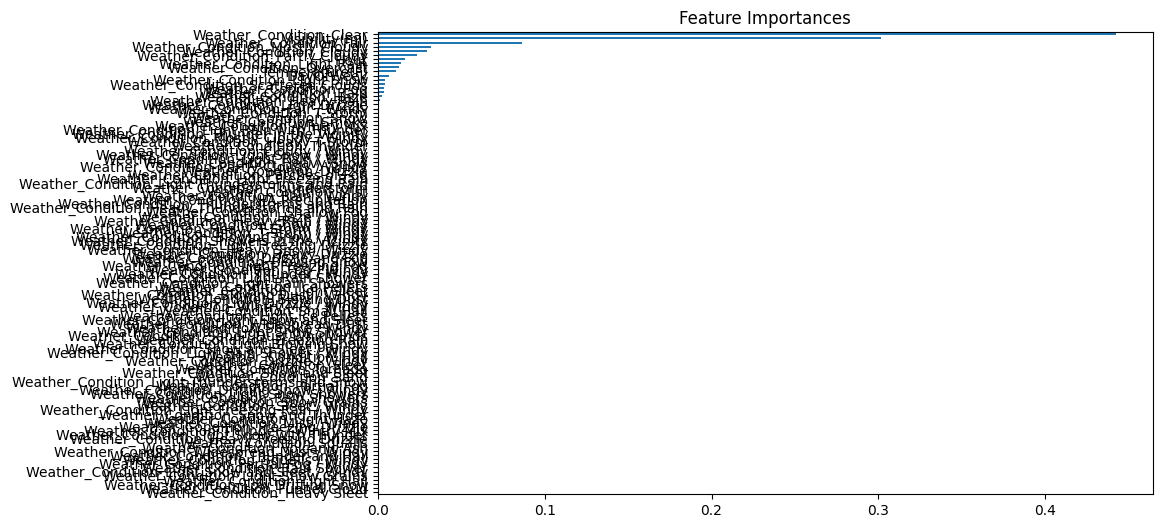

In [28]:
#Now we run some cross validation to confirm that the model is not overfitted

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

# Analyze feature importance
feature_importances = model.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [30]:
# Analyze feature importance
feature_importances = model.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Convert feature importances to a DataFrame for display
feature_importances_df = importances.reset_index()
feature_importances_df.columns = ['Feature', 'Importance']

# Display the feature importances
print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
                                       Feature  Importance
0                      Weather_Condition_Clear    0.442424
1                               Visibility(mi)    0.301312
2                       Weather_Condition_Fair    0.086422
3              Weather_Condition_Mostly Cloudy    0.031816
4                     Weather_Condition_Cloudy    0.029212
..                                         ...         ...
107                  Weather_Condition_Squalls    0.000000
108         Weather_Condition_Thunder and Hail    0.000000
109          Weather_Condition_Squalls / Windy    0.000000
110             Weather_Condition_Volcanic Ash    0.000000
111  Weather_Condition_Widespread Dust / Windy    0.000000

[112 rows x 2 columns]


From above we can see that Weather condition clear and visibility are both very important features used by the RF model when predicting.
Next we make some adjustments to the code below to rectify the likely overfitting.

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Convert Start_Time to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Select features
features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition']
df = df[features + ['Accident_Occurred']]

# Handle missing values
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Condition'])

# Create synthetic non-accident data
non_accidents_count = len(df)
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=non_accidents_count),
    'DayOfWeek': np.random.randint(0, 7, size=non_accidents_count),
    'Temperature(F)': np.random.normal(df['Temperature(F)'].mean(), df['Temperature(F)'].std(), non_accidents_count),
    'Visibility(mi)': np.random.normal(df['Visibility(mi)'].mean(), df['Visibility(mi)'].std(), non_accidents_count),
    'Accident_Occurred': 0
})

# For simplicity, assume 'Clear' weather condition for synthetic non-accidents
for col in df.columns:
    if 'Weather_Condition_' in col:
        non_accidents[col] = 0
non_accidents['Weather_Condition_Clear'] = 1

# Combine the accident and non-accident datasets
combined_df = pd.concat([df, non_accidents])

# Resample to balance the dataset
min_count = min(combined_df['Accident_Occurred'].value_counts())
balanced_df = pd.concat([
    combined_df[combined_df['Accident_Occurred'] == 1].sample(min_count, random_state=42),
    combined_df[combined_df['Accident_Occurred'] == 0].sample(min_count, random_state=42)
])

# Split the data into training and testing sets
X = balanced_df.drop(columns='Accident_Occurred')
y = balanced_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create a pipeline that preprocesses the data and trains a Random Forest classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1895093719.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[col] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1895093719.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[col] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1895093719.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

Accuracy: 0.99859
Confusion Matrix:
[[99994    19]
 [  263 99724]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100013
           1       1.00      1.00      1.00     99987

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

5-Fold Cross-Validation Scores: [0.99875  0.998715 0.9988   0.9987   0.99871 ]
Mean Cross-Validation Score: 0.9987349999999999


As we can see above this is still too high so below we will check the feature importance again.

In [39]:
# Analyze feature importance
model = model_pipeline.named_steps['classifier']
feature_importances = model.feature_importances_
features = X_train.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Convert feature importances to a DataFrame for display
feature_importances_df = importances.reset_index()
feature_importances_df.columns = ['Feature', 'Importance']

# Display feature importances
print("Feature Importances:")
print(feature_importances_df)

Feature Importances:
                                Feature  Importance
0               Weather_Condition_Clear    0.449602
1                        Visibility(mi)    0.304659
2                Weather_Condition_Fair    0.083693
3       Weather_Condition_Mostly Cloudy    0.028515
4              Weather_Condition_Cloudy    0.027424
..                                  ...         ...
107     Weather_Condition_Sleet / Windy    0.000000
108           Weather_Condition_Squalls    0.000000
109   Weather_Condition_Squalls / Windy    0.000000
110  Weather_Condition_Thunder and Hail    0.000000
111      Weather_Condition_Volcanic Ash    0.000000

[112 rows x 2 columns]


It's likely that when we assumed 'Clear' weather condition for synthetic non-accidents that it introduced bias in our data. 
Therefore to reduce the bias we can randomly assign realistic weather conditions to the synthetic non-accident data.
Then we run the Random Forest model again and run the cross validation checks to ensure there is no overfitting, while also checking the feature importance. 

In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
df = pd.read_csv(file_path)

# Convert Start_Time to datetime format, handling various formats
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT values in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Select features
features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition']
df = df[features + ['Accident_Occurred']]

# Handle missing values
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Condition'])

# Create synthetic non-accident data
non_accidents_count = len(df)
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=non_accidents_count),
    'DayOfWeek': np.random.randint(0, 7, size=non_accidents_count),
    'Temperature(F)': np.random.normal(df['Temperature(F)'].mean(), df['Temperature(F)'].std(), non_accidents_count),
    'Visibility(mi)': np.random.normal(df['Visibility(mi)'].mean(), df['Visibility(mi)'].std(), non_accidents_count),
    'Accident_Occurred': 0
})

# Assign realistic weather conditions based on distribution in actual accident data
weather_conditions = df.filter(like='Weather_Condition_').columns
weather_distribution = df[weather_conditions].mean()
weather_samples = np.random.choice(weather_conditions, size=non_accidents_count, p=weather_distribution)

# Initialize all weather condition columns to 0
for condition in weather_conditions:
    non_accidents[condition] = 0

# Set the sampled weather conditions to 1
for i, condition in enumerate(weather_samples):
    non_accidents.at[i, condition] = 1

# Combine the accident and non-accident datasets
combined_df = pd.concat([df, non_accidents])

# Resample to balance the dataset
min_count = min(combined_df['Accident_Occurred'].value_counts())
balanced_df = pd.concat([
    combined_df[combined_df['Accident_Occurred'] == 1].sample(min_count, random_state=42),
    combined_df[combined_df['Accident_Occurred'] == 0].sample(min_count, random_state=42)
])

# Split the data into training and testing sets
X = balanced_df.drop(columns='Accident_Occurred')
y = balanced_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create a pipeline that preprocesses the data and trains a Random Forest classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5)

# Analyze feature importance
model = model_pipeline.named_steps['classifier']
feature_importances = model.feature_importances_
features = X_train.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Convert feature importances to a DataFrame for display
feature_importances_df = importances.reset_index()
feature_importances_df.columns = ['Feature', 'Importance']

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")
print("Feature Importances:")
print(feature_importances_df)

C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1721512476.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[condition] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1721512476.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[condition] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_16276\1721512476.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

Accuracy: 0.9850831327634382
Confusion Matrix:
[[89444   926]
 [ 1770 88595]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     90370
           1       0.99      0.98      0.99     90365

    accuracy                           0.99    180735
   macro avg       0.99      0.99      0.99    180735
weighted avg       0.99      0.99      0.99    180735

5-Fold Cross-Validation Scores: [0.98548151 0.98586328 0.98482308 0.98475669 0.98556442]
Mean Cross-Validation Score: 0.9852977957389777
Feature Importances:
                                   Feature    Importance
0                           Visibility(mi)  8.003101e-01
1                           Temperature(F)  8.552704e-02
2                                     Hour  5.580877e-02
3                                DayOfWeek  2.263071e-02
4                   Weather_Condition_Fair  5.042269e-03
..                                     ...           ...
106     Weather

The updated results indicate a high-performing model with an accuracy of approximately 98.51%, consistent cross-validation scores, and meaningful feature importances. This suggests that the model is robust and not overfitting, and the issue with data leakage has been addressed.

Key Results:
Accuracy: 98.51%
Confusion Matrix:
True Negatives (TN): 89,444
False Positives (FP): 926
False Negatives (FN): 1,770
True Positives (TP): 88,595
Classification Report:
Precision, recall, and F1-scores are all very high for both classes.
Cross-Validation Scores: Consistent scores around 98.53%, indicating robustness.
Feature Importances:
Visibility(mi): The most influential feature, significantly impacting the model's predictions.
Temperature(F): plays the 2nd biggest influence on the model's predictions.
Hour, DayOfWeek: These features also contribute to the model, though to a lesser extent.

Logically, this makes sense that visibility holds the most importance in determining whether an indiviual is likely to crash or not as being able to see what is ahead of you on the road is essential when on the road and poor visibility can impact that. Additionally, temperature being the second largest factor also makes logical sense as lower temperatures can indicate chances of snow and ice making the roads slippery while also obfuscating visbility as well. This provides strong evidence to suggest that our initial hypothesis was wrong and that hour of day or day of the week are not significant factors that can be used to indicate how likely someone is to crash while driving, atleast when compared to more likely factors such as visibility and temperature. 

As seen below, in order to create the ideal Random Forest model we then do some hyperparamter tuning in order to find the best parameters to use for our model.

In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [11]:
# Split the data into training and testing sets
X = balanced_df.drop(columns='Accident_Occurred')
y = balanced_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Define the Random Forest model and parameter grid for RandomizedSearchCV
model = RandomForestClassifier(random_state=42)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create a pipeline that preprocesses the data and trains the Random Forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to find the best model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Display the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}


Random Forest Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}

We will create a Random Forest model with these best paramters near the end of the code file for clarity's sake and to make it easier to compare.

Below, for clarity's sake we are saving the cleaned dataset as a new variable to clean up the code file by saving it as a new variable cleaned_df

In [4]:
#New DF with just the clean data

file_path = 'C:/Users/zack/Downloads/US_Accidents_March23_sampled_500k.csv'
df = pd.read_csv(file_path)

# Convert Start_Time to datetime format, handling various formats
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows with NaT values in Start_Time
df = df.dropna(subset=['Start_Time'])

# Extract hour and day of the week
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Create target variable: accidents occur (1)
df['Accident_Occurred'] = 1

# Select features
features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition']
df = df[features + ['Accident_Occurred']]

# Handle missing values
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Weather_Condition'])

# Create synthetic non-accident data
non_accidents_count = len(df)
non_accidents = pd.DataFrame({
    'Hour': np.random.randint(0, 24, size=non_accidents_count),
    'DayOfWeek': np.random.randint(0, 7, size=non_accidents_count),
    'Temperature(F)': np.random.normal(df['Temperature(F)'].mean(), df['Temperature(F)'].std(), non_accidents_count),
    'Visibility(mi)': np.random.normal(df['Visibility(mi)'].mean(), df['Visibility(mi)'].std(), non_accidents_count),
    'Accident_Occurred': 0
})

# Assign realistic weather conditions based on distribution in actual accident data
weather_conditions = df.filter(like='Weather_Condition_').columns
weather_distribution = df[weather_conditions].mean()
weather_samples = np.random.choice(weather_conditions, size=non_accidents_count, p=weather_distribution)

# Initialize all weather condition columns to 0
for condition in weather_conditions:
    non_accidents[condition] = 0

# Set the sampled weather conditions to 1
for i, condition in enumerate(weather_samples):
    non_accidents.at[i, condition] = 1

# Combine the accident and non-accident datasets
combined_df = pd.concat([df, non_accidents])

# Resample to balance the dataset
min_count = min(combined_df['Accident_Occurred'].value_counts())
balanced_df = pd.concat([
    combined_df[combined_df['Accident_Occurred'] == 1].sample(min_count, random_state=42),
    combined_df[combined_df['Accident_Occurred'] == 0].sample(min_count, random_state=42)
])

# Save the cleaned and prepared data into a new variable
cleaned_df = balanced_df

C:\Users\zack\AppData\Local\Temp\ipykernel_45852\444178460.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[condition] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_45852\444178460.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  non_accidents[condition] = 0
C:\Users\zack\AppData\Local\Temp\ipykernel_45852\444178460.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

Below we are running our 3rd and final model the KNN (K-nearest neighbour) model due to its easy hypertuning and non=parametric nature, similar to the Random Forest model.

In [6]:
#Making a KNN model 

from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X = cleaned_df.drop(columns='Accident_Occurred')
y = cleaned_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create a pipeline that preprocesses the data and trains the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")


Accuracy: 0.842006252247766
Confusion Matrix:
[[71835 18535]
 [10020 80345]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83     90370
           1       0.81      0.89      0.85     90365

    accuracy                           0.84    180735
   macro avg       0.85      0.84      0.84    180735
weighted avg       0.85      0.84      0.84    180735

5-Fold Cross-Validation Scores: [0.84160788 0.8433563  0.84300219 0.8427864  0.84008543]
Mean Cross-Validation Score: 0.8421676377961429


This is a good model that does not appear to be overfitted in our data.

Next we run hyper parameter tuning to find the best paramters for this model and in order to increase the f1 score and accuracy 

In [9]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X = cleaned_df.drop(columns='Accident_Occurred')
y = cleaned_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Define the KNN model and parameter grid for RandomizedSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'classifier__n_neighbors': list(range(1, 31)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a pipeline that preprocesses the data and trains the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(knn_pipeline, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to find the best model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Display the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 4, 'classifier__metric': 'manhattan'}


We were given the Best Parameters for the KNN model: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 4, 'classifier__metric': 'manhattan'}

In [12]:
#Now we create the KNN model using the best hyperparameters given

# Split the data into training and testing sets
X = cleaned_df.drop(columns='Accident_Occurred')
y = cleaned_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Define the KNN model with best parameters
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='manhattan')

# Create a pipeline that preprocesses the data and trains the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = knn_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

Accuracy: 0.904340609179185
Confusion Matrix:
[[80665  9705]
 [ 7584 82781]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     90370
           1       0.90      0.92      0.91     90365

    accuracy                           0.90    180735
   macro avg       0.90      0.90      0.90    180735
weighted avg       0.90      0.90      0.90    180735

5-Fold Cross-Validation Scores: [0.90493817 0.90536974 0.90593964 0.90592857 0.90415749]
Mean Cross-Validation Score: 0.905266721063979


Above is KNN model with best parameters after hyperparameter tuning

In [13]:
#Here we run the Random Forest Model with the best parameters


# Split the data into training and testing sets
X = cleaned_df.drop(columns='Accident_Occurred')
y = cleaned_df['Accident_Occurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical data
numeric_features = ['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)']
categorical_features = [col for col in X.columns if 'Weather_Condition' in col]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', 'passthrough')
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Define the Random Forest model with best parameters
rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=None, bootstrap=False, random_state=42)

# Create a pipeline that preprocesses the data and trains the Random Forest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5)

# Display results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

Accuracy: 0.9860126704844109
Confusion Matrix:
[[89425   945]
 [ 1583 88782]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     90370
           1       0.99      0.98      0.99     90365

    accuracy                           0.99    180735
   macro avg       0.99      0.99      0.99    180735
weighted avg       0.99      0.99      0.99    180735

5-Fold Cross-Validation Scores: [0.9854981  0.98685368 0.98675409 0.98592414 0.98625051]
Mean Cross-Validation Score: 0.9862561056248229


Above is Random Forest model after hyper paramter tuning to find the best parameters

In [45]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

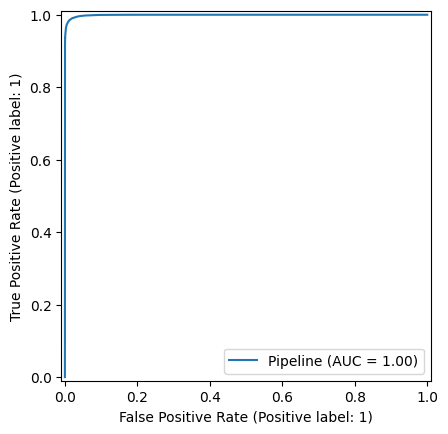

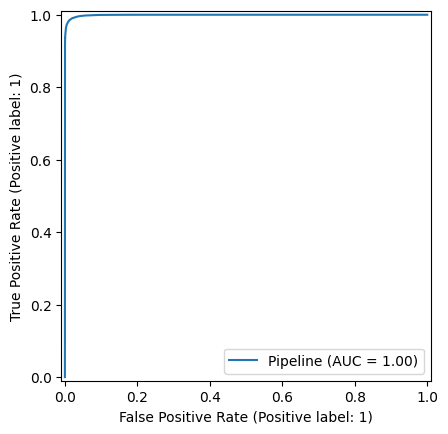

In [47]:
# Plot ROC Curve for Random Forest Model
roc_display = RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)
roc_display.plot()
plt.show()

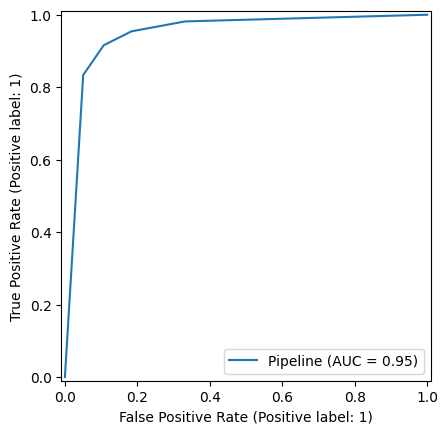

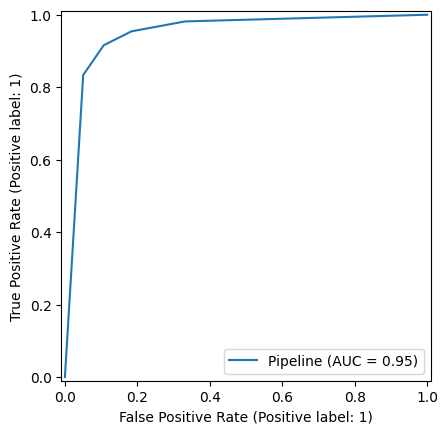

In [48]:
# Plot ROC Curve for KNN model
roc_display_knn = RocCurveDisplay.from_estimator(knn_pipeline, X_test, y_test)
roc_display_knn.plot()
plt.show()